## NLP & Binary Classification: Twitter Global Warming sentiment data
https://www.crowdflower.com/data-for-everyone/

** Dataset Information: **

- 6090 tweets for belief in the existence of global warming or climate change. “Yes” if the tweet suggests global warming is occurring, “No” if not occurring. 

** Attribute Information:**

- tweet                   
- existence             
- existence.confidence                   

** Objective of this project **

predict global warming sentiment (Yes or no) from tweets

# Data

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('1377884570_tweet_global_warming.csv', encoding='latin')
pd.set_option('display.max_colwidth', -1)
df.head()

,tweet,existence,existence.confidence
0,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]",Yes,1.0000
1,Fighting poverty and global warming in Africa [link],Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to reduce global warming [link],Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link],Yes,0.8087


In [3]:
df.tail()

,tweet,existence,existence.confidence
6085,"@bloodless_coup ""The phrase 'global warming' should be abandoned in favor of 'climate change', Luntz says,"" http://bit.ly/7bIY0c #p2 #tcot",Y,1.0000
6086,Virginia to Investigate Global Warming Scientist Mann: http://bit.ly/aDlavg,NaN,1.0000
6087,Global warming you tube parody you will enjoy #IPCC #ocra http://bit.ly/bBGWhC,N,0.6411
6088,One-Eyed Golfer: Don't dare tell me about global warming: Twenty-five of the forty-nine golfers making the cut thi... http://bit.ly/akeAxp,N,1.0000
6089,man made global warming a hair brained theory 4 the scientifically challenged the IPPC has nothing to back up claims #tcot #p2 #climategate,N,1.0000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6090 entries, 0 to 6089
Data columns (total 3 columns):
tweet                   6090 non-null object
existence               4225 non-null object
existence.confidence    6087 non-null float64
dtypes: float64(1), object(2)
memory usage: 142.8+ KB


In [5]:
df.describe()

,existence.confidence
count,6087.000000
mean,0.794478
std,0.180054
min,0.334600
25%,0.658500
50%,0.707600
75%,1.000000
max,1.000000


# Exploratory Data Analysis

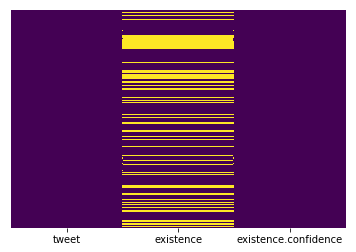

In [6]:
# missing data
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
df[df['existence'].isnull()].head()

,tweet,existence,existence.confidence
14,Spring storm season starting a little late this year??? Must be global warming!,NaN,1.0000
34,I truly Fat ASS Gore should get the Scam Artist Award of the decade with his Global Warming and Energy Credits worth close to Billion.,NaN,NaN
40,Air ban led by flawed computer models. Global warming come to mind? [link],NaN,NaN
47,"Despite Climategate, LEFT investing heavily in global warming hysteria as new way 2 impose nat'l & international controls on human freedom.",NaN,NaN
48,Global warming you tube explanation you will enjoy #IPCC #teaparty [link],NaN,0.8485


In [8]:
df.dropna(inplace=True)
df.reset_index(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 4 columns):
index                   4225 non-null int64
tweet                   4225 non-null object
existence               4225 non-null object
existence.confidence    4225 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 132.1+ KB


Y      2554
N      1053
Yes    557 
No     61  
Name: existence, dtype: int64

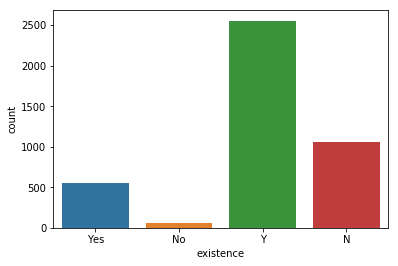

In [9]:
# inspect sentiment
sns.countplot(df['existence'])
df['existence'].value_counts() #imbalanced

In [10]:
# create new 'class' column
dict_class = {'Y':1, 'Yes':1, 'No':0, 'N':0}
df['class'] = df['existence'].map(dict_class)
df[['existence','class']].tail()

,existence,class
4220,Y,1
4221,Y,1
4222,N,0
4223,N,0
4224,N,0


1    3111
0    1114
Name: class, dtype: int64

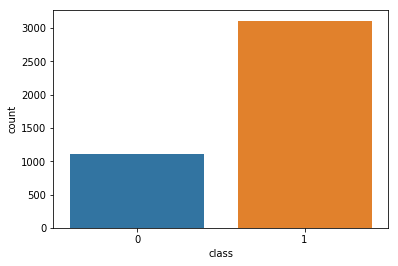

In [11]:
sns.countplot(df['class'])
df['class'].value_counts()

In [12]:
# tweet length
df['tweet_length'] = df['tweet'].apply(len)
df[['class','tweet_length','tweet']].head()

,class,tweet_length,tweet
0,1,118,"Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]"
1,1,52,Fighting poverty and global warming in Africa [link]
2,1,75,Carbon offsets: How a Vatican forest failed to reduce global warming [link]
3,1,75,Carbon offsets: How a Vatican forest failed to reduce global warming [link]
4,1,72,URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link]


In [13]:
df['tweet_length'].describe()

count    4225.000000
mean     111.799763 
std      27.101025  
min      21.000000  
25%      91.000000  
50%      120.000000 
75%      137.000000 
max      161.000000 
Name: tweet_length, dtype: float64

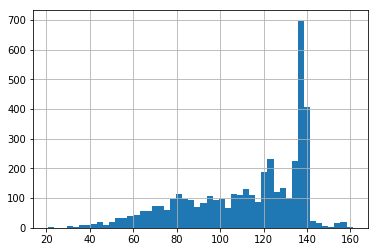

In [14]:
df['tweet_length'].hist(bins=50)

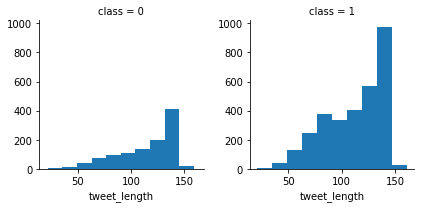

In [15]:
g = sns.FacetGrid(df,col='class')
g.map(plt.hist,'tweet_length')

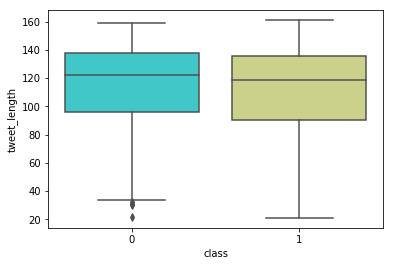

In [16]:
sns.boxplot(x='class',y='tweet_length',data=df,palette='rainbow')

# Data Preprocessing

#### Clean Text

In [17]:
from nltk.corpus import stopwords
import re
def clean_text(s):
    stopset = set(stopwords.words('english')+['rt','via']) #stopwords
    s = re.sub('\[link]', '', s) #remove '[link]'
    s = re.sub(r'http\S+', '', s) #remove urls
    return ' '.join(filter(lambda word: word not in stopset, s.split()))

df['clean_text'] = df['tweet'].apply(clean_text)

In [18]:
X = df['clean_text']
y = df['class'].values

#### Spilt Train Test sets

In [19]:
# fix random seed for reproducibility
seed = 101
np.random.seed(seed)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3380,) (845,) (3380,) (845,)


#### Tokenize text

In [21]:
from keras.preprocessing.text import Tokenizer
max_features = 10000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


In [22]:
len(X_train)
#X_train[:10]
#tokenizer.word_counts
#tokenizer.word_index

3380

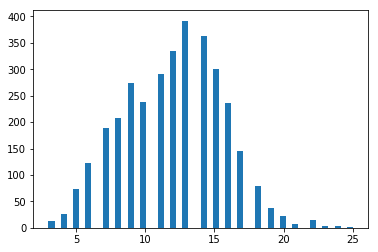

In [23]:
totalNumWords = [len(one_comment) for one_comment in X_train]
plt.hist(totalNumWords,bins = 50)
plt.show()

In [24]:
from keras.preprocessing import sequence
max_words = max(totalNumWords)
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
print(X_train.shape,X_test.shape)
#X_train[np.argmax(totalNumWords)]

(3380, 25) (845, 25)


# 1. MLP

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Embedding,Dropout
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix,classification_report
import keras.backend as K

batch_size = 32
epochs = 100

def create_nn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Flatten())
    model.add(Dense(200, activation='relu'))
    model.add(Dense(100, activation='relu'))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [26]:
# create the model
model = create_nn()
# callbacks
file_path = 'weights_best_nn.hdf5'
early_stop = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='max') #'val_acc'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max') #'val_acc'
callbacks_list = [checkpoint, early_stop]
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          callbacks=callbacks_list, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               640200    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_3 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 21        
Total params: 1,942,341
Trainable params: 1,942,341
Non-trainable params: 0
_________________________________________________________________


In [27]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

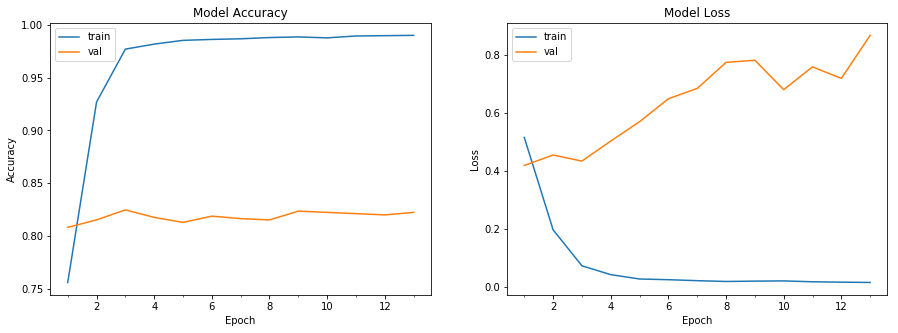

In [28]:
plot_model_history(model_history)

In [29]:
def model_evaluate(file_path):
    # predict class with test set
    model.load_weights(file_path)
    y_pred_test =  model.predict_classes(X_test, batch_size=batch_size, verbose=0)
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(y_test,y_pred_test)*100))
    print('roc auc:\t{:0.3f}'.format(roc_auc_score(y_test,y_pred_test)))

    #classification report
    print('\n')
    print(classification_report(y_test, y_pred_test))

    #confusion matrix
    confmat = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(figsize=(2.5, 2.5))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()

Accuracy:	82.5%
roc auc:	0.743


             precision    recall  f1-score   support

          0       0.71      0.57      0.63       223
          1       0.86      0.92      0.89       622

avg / total       0.82      0.82      0.82       845



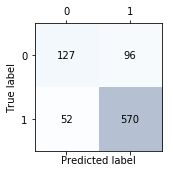

In [30]:
model_evaluate('weights_best_nn.hdf5')

# 2. 1D CNN

In [31]:
from keras.layers import Conv1D,MaxPooling1D
def create_cnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [32]:
# create the model
model = create_cnn()
# callbacks
file_path = 'weights_best_cnn.hdf5'
early_stop = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='max') #'val_acc'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max') #'val_acc'
callbacks_list = [checkpoint, early_stop]
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          callbacks=callbacks_list, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 384)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                7700      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,300,041
Trainable params: 1,300,041
Non-trainable params: 0
_________________________________________________________________


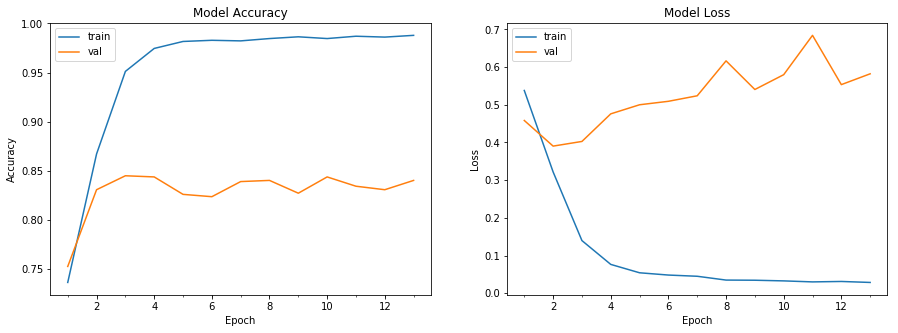

In [33]:
plot_model_history(model_history)

Accuracy:	84.5%
roc auc:	0.810


             precision    recall  f1-score   support

          0       0.69      0.74      0.71       223
          1       0.90      0.88      0.89       622

avg / total       0.85      0.84      0.85       845



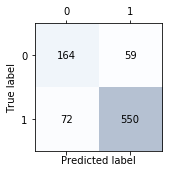

In [34]:
model_evaluate('weights_best_cnn.hdf5')

# 3. RNN

In [35]:
from keras.layers import LSTM
def create_rnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [36]:
# create the model
model = create_rnn()
# callbacks
file_path = 'weights_best_rnn.hdf5'
early_stop = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='max') #'val_acc'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max') #'val_acc'
callbacks_list = [checkpoint, early_stop]
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          callbacks=callbacks_list, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               91600     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,373,641
Trainable params: 1,373,641
Non-trainable params: 0
_________________________________________________________________
None
Train on 3380 samples, validate on 845 samples
Epoch 1/100
Epoch 00001: val_acc improved from -inf to 0.81538, saving model to weights_best_rnn.hdf5
 - 9s - loss: 0.5193 - acc: 0.7577 - val_loss: 0.4083 - val_acc: 0.8154
Epoch 2/100
Epoch 00002: val_acc impro

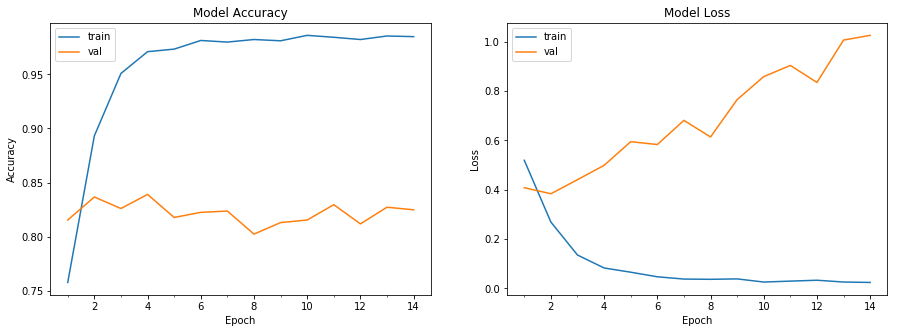

In [37]:
plot_model_history(model_history)

Accuracy:	83.9%
roc auc:	0.755


             precision    recall  f1-score   support

          0       0.75      0.58      0.65       223
          1       0.86      0.93      0.90       622

avg / total       0.83      0.84      0.83       845



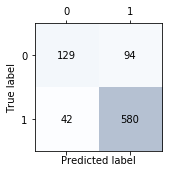

In [38]:
model_evaluate('weights_best_rnn.hdf5')

# 4. CNN + RNN

In [39]:
def create_cnn_rnn():
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=X_train.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    print(model.summary())
    return model

In [40]:
# create the model
model = create_cnn_rnn()
# callbacks
file_path = 'weights_best_cnn_rnn.hdf5'
early_stop = EarlyStopping(monitor='val_acc', patience=10, verbose=0, mode='max') #'val_acc'
checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max') #'val_acc'
callbacks_list = [checkpoint, early_stop]
# train the model
model_history = model.fit(X_train, y_train, validation_data=(X_test, y_test), 
                          epochs=epochs, batch_size=batch_size,
                          callbacks=callbacks_list, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 128)           1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 25, 32)            12320     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 12, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               53200     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                2020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,347,561
Trainable params: 1,347,561
Non-trainable params: 0
_________________________________________________________________


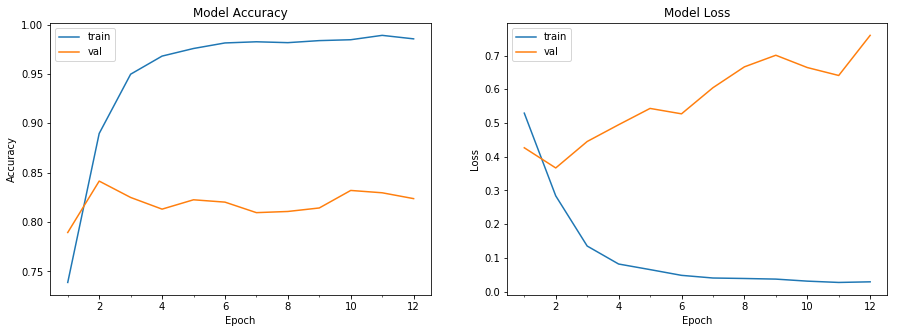

In [41]:
plot_model_history(model_history)

Accuracy:	84.1%
roc auc:	0.784


             precision    recall  f1-score   support

          0       0.71      0.66      0.69       223
          1       0.88      0.91      0.89       622

avg / total       0.84      0.84      0.84       845



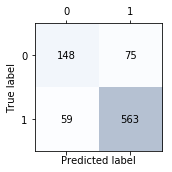

In [42]:
model_evaluate('weights_best_cnn_rnn.hdf5')